# Tutorial: Sit to Stand and Stand to Sit Detection

**Author:** Masoud Abedinifar

**Last update:** Monday 11 Mar. 2024

## Learning objectives
By the end of this tutorial:
- You can load data from a recording that belongs to one of the available datasets,
- Apply the Pham Sit to Stand and Stand to Sit Detection algorithm.
- Visualize the results of the algorithm.  
- Interpret the detected postural transitions (sit to stand and stand to sit) for further analysis.

## Import libraries
The necessary libraries such as numpy, matplotlib.pyplot, and dataset are imported. Make sure that you have all the required libraries and modules installed before running this code. You also may need to install the 'ngmt' library and its dependencies if you haven't already.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ngmt.datasets import keepcontrol
from ngmt.modules.ssd import PhamSittoStandStandtoSitDetection
from ngmt.config import cfg_colors

## Data Preparation

To implement Sit to Stand and Stand to Sit Detection algorithm, we load example data.


In [2]:
# The 'file_path' variable holds the absolute path to the data file
file_path = (
    r"\\uni-kiel.de\files\bigprojects\neurogeriatrics_data\Keep Control\Data\lab dataset\rawdata\sub-pp002\motion\sub-pp002_task-homePart1_tracksys-imu_motion.tsv"
)

In [3]:
# In this example, we use "imu" as tracking_system and "pelvis" as tracked points.
tracking_sys = "imu"
tracked_points = {tracking_sys: ["pelvis"]}

In [4]:
# The 'keepcontrol.load_recording' function is used to load the data from the specified file_path
recording = keepcontrol.load_recording(
    file_name=file_path, tracking_systems=[tracking_sys], tracked_points=tracked_points
)

# Print recording data
print(f"Recording: {recording}")

Recording: NGMTRecording(data={'imu':        pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z  pelvis_ANGVEL_x  \
0          0.993190     -0.074219      0.025876        -0.089270   
1          0.992179     -0.072742      0.024897        -0.173289   
2          0.990726     -0.072742      0.026365         0.960967   
3          0.998559     -0.067859      0.030279         0.000000   
4          0.988263     -0.074219      0.020983         0.351829   
...             ...           ...           ...              ...   
84589      0.964385     -0.042958     -0.288087         0.000000   
84590      0.957500     -0.044435     -0.292490         1.396815   
84591      0.962427     -0.043470     -0.280286         0.871697   
84592      0.956552     -0.052243     -0.291022         1.223526   
84593      0.960469     -0.048354     -0.288087         0.614389   

       pelvis_ANGVEL_y  pelvis_ANGVEL_z  pelvis_MAGN_x  pelvis_MAGN_y  \
0             2.883682        -0.611571      -0.990707      -0.281256   

In [5]:
# Load lower back acceleration data
acceleration_data = recording.data[tracking_sys][
    ["pelvis_ACC_x", "pelvis_ACC_y", "pelvis_ACC_z"]
]

# Print acceleration data
print(f"acceleration_data (g): {acceleration_data}")

acceleration_data (g):        pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z
0          0.993190     -0.074219      0.025876
1          0.992179     -0.072742      0.024897
2          0.990726     -0.072742      0.026365
3          0.998559     -0.067859      0.030279
4          0.988263     -0.074219      0.020983
...             ...           ...           ...
84589      0.964385     -0.042958     -0.288087
84590      0.957500     -0.044435     -0.292490
84591      0.962427     -0.043470     -0.280286
84592      0.956552     -0.052243     -0.291022
84593      0.960469     -0.048354     -0.288087

[84594 rows x 3 columns]


In [6]:

# Load lower back gyro data
gyro_data = recording.data[tracking_sys][
    ["pelvis_ANGVEL_x", "pelvis_ANGVEL_y", "pelvis_ANGVEL_z"]
]

# Print gyro data
print(f"gyro_data (deg/s): {gyro_data}")

gyro_data (deg/s):        pelvis_ANGVEL_x  pelvis_ANGVEL_y  pelvis_ANGVEL_z
0            -0.089270         2.883682        -0.611571
1            -0.173289         3.062097        -0.437273
2             0.960967         2.099487        -1.137522
3             0.000000         2.883682        -0.088678
4             0.351829         2.099487        -0.700249
...                ...              ...              ...
84589         0.000000         1.398275         0.088678
84590         1.396815         1.224009        -0.088678
84591         0.871697         1.224009        -0.174298
84592         1.223526         0.000000        -0.348595
84593         0.614389         0.000000         0.000000

[84594 rows x 3 columns]


In [7]:
# Get the corresponding sampling frequency directly from the recording
sampling_frequency = recording.channels[tracking_sys][
    recording.channels[tracking_sys]["name"] == "pelvis_ACC_x"
]["sampling_frequency"].values[0]

# Print sampling frequency and its type
print(f"sampling frequency: {sampling_frequency} Hz")
print(f"type of sampling frequency: {type(sampling_frequency)}")

sampling frequency: 200 Hz
type of sampling frequency: <class 'numpy.int64'>


## Visualisation of the Data
The raw acceleration and gyro data including components of x, y and z axis are plotted.

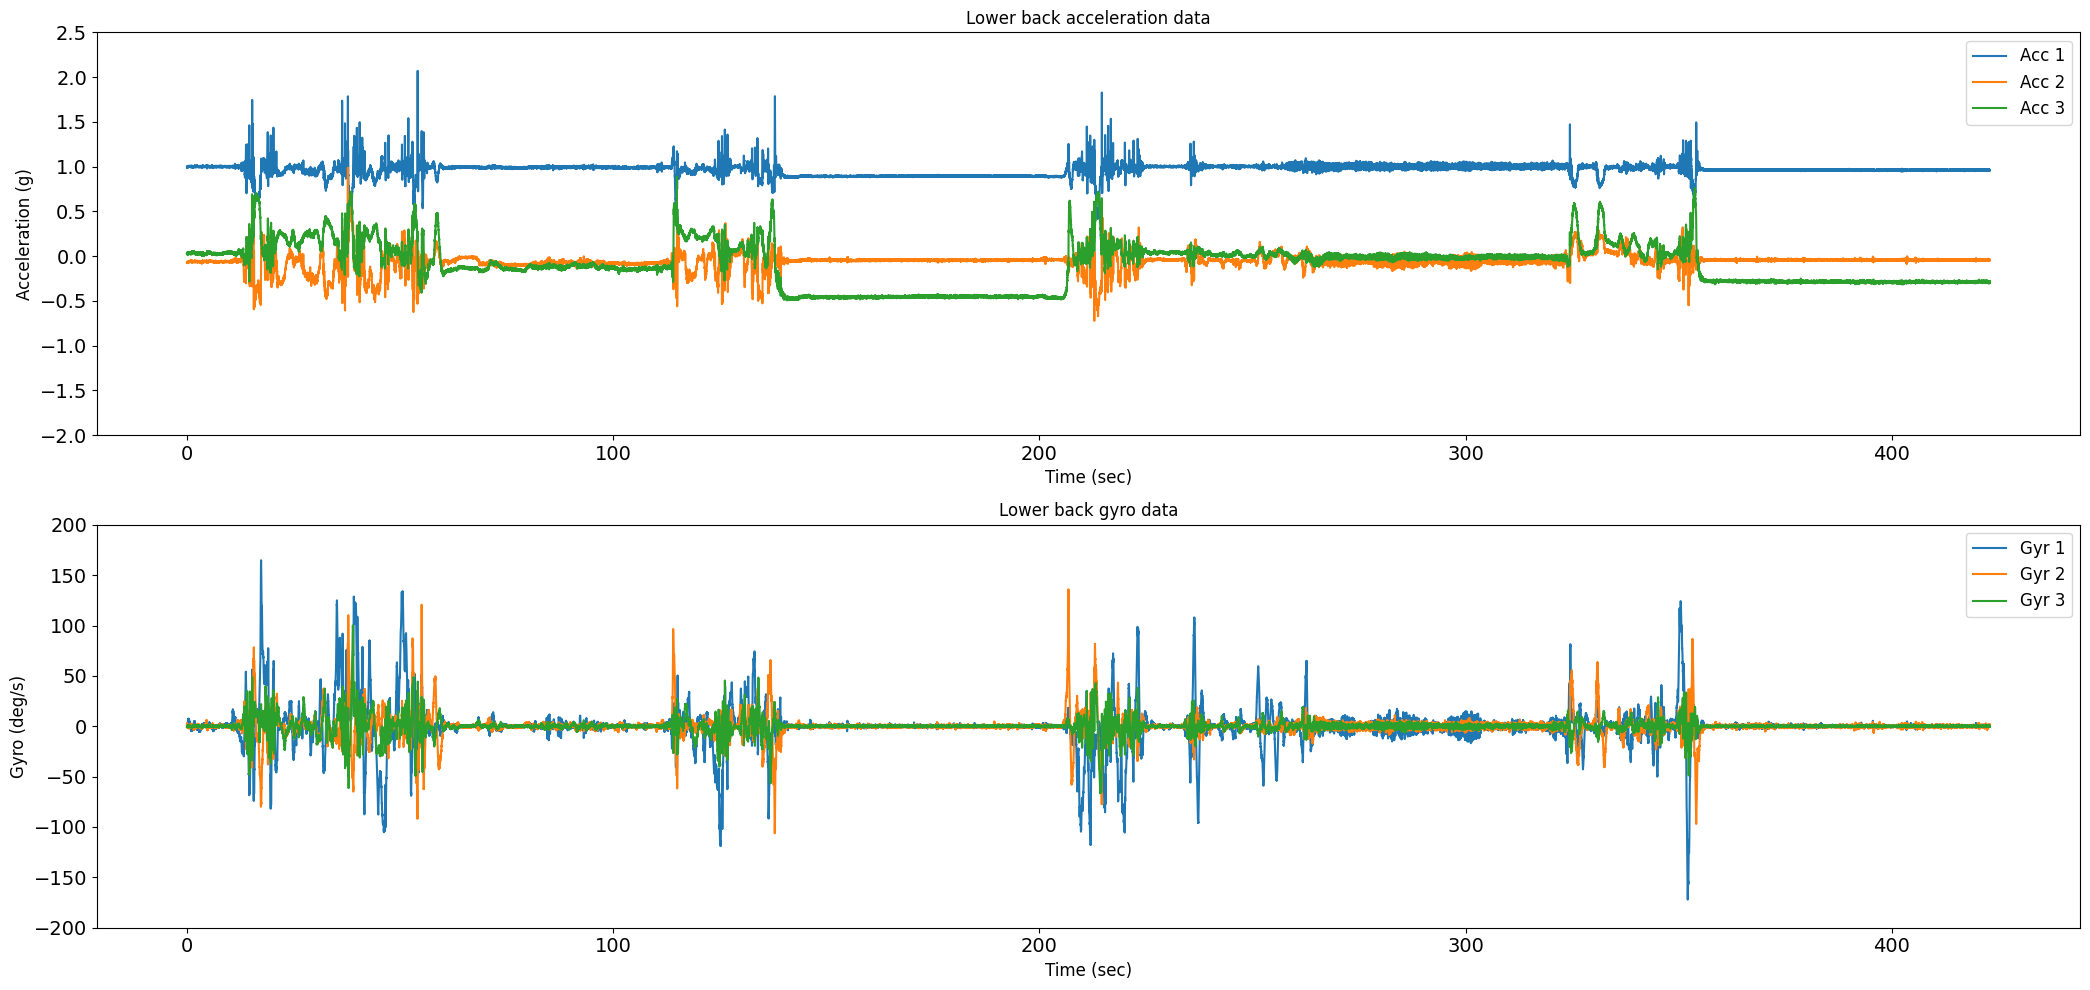

In [8]:
# Plot acceleration and gyro in subplots
fig = plt.figure(figsize=(21, 10))

# Subplot 1: Acceleration data
ax1 = plt.subplot(211)
for i in range(3):
    ax1.plot(
        np.arange(len(acceleration_data)) / sampling_frequency,
        acceleration_data[f"pelvis_ACC_{chr(120 + i)}"],
        label=f"Acc {i + 1}",
    )
ax1.set_title("Lower back acceleration data")
ax1.set_ylabel(f"Acceleration (g)", fontsize=12)
ax1.set_xlabel(f"Time (sec)", fontsize=12)
ax1.legend(loc="upper right", fontsize=12)
ax1.set_ylim(-2, 2.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 2: Gyro data
ax2 = plt.subplot(212)
for i in range(3):
    ax2.plot(
        np.arange(len(gyro_data)) / sampling_frequency,
        gyro_data[f"pelvis_ANGVEL_{chr(120 + i)}"],
        label=f"Gyr {i + 1}",
    )
ax2.set_title("Lower back gyro data")
ax2.set_ylabel(f"Gyro (deg/s)", fontsize=12)
ax2.set_xlabel(f"Time (sec)", fontsize=12)
ax2.legend(loc="upper right", fontsize=12)
ax2.set_ylim(-200, 200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.show()


## Applying pham sit to stand and stand to sit detection algorithm
Now, we are running pham sit to stand and stand to sit detection algorithm from pham module [`NGMT.ngmt.modules.ssd._pham.SittoStandStandtoSitDetection`](https://github.com/neurogeriatricskiel/NGMT/tree/main/ngmt/modules/ssd/_pham.py) to detect sit to stand and stand to sit. The inputs consist of accelerometer and gyroscope data (N, 6) for the x, y, and z axes, the initial sampling frequency of the data.

## Event information
The postural transition information is stored in the 'postural_transitions_' attribute, which is a pandas DataFrame in BIDS format with the following columns:
- **onset**: Start of the event (sit to stand or stand to sit) in seconds.
- **duration**: Duration of the event in seconds.
- **event type**: Event type which is either sit to stand or stand to sit.
- **postural transition angle**: Angle of the postural transition in degree [°].
- **maximum flexion velocity**: Maximum flexion velocity [°/s].
- **maximum extension velocity**: Maximum extension velocity [°/s].
- **tracking_systems**: Tracking system which is 'imu' for this example.
- **tracked_points**: Tracked points on the body which is 'LowerBack' for this example.

Additionally, if plot_results is set to 'True', the detected events will plotted on the data. The onset is represented with the vertical red line and the grey area represents the duration of the postural transition (sit to stand or stand to sit) detected by the algorithm.

In [9]:
# Put acceleration and gyro data in the input data as pandas Dataframe which will be used as input of the algorithm
input_data = [acceleration_data, gyro_data]

# Concatenate acceleration_data and gyro_data along axis=1 (columns)
input_data = pd.concat([acceleration_data, gyro_data], axis=1)

# Print input data and its type
print(f"input data: {input_data}")

input data:        pelvis_ACC_x  pelvis_ACC_y  pelvis_ACC_z  pelvis_ANGVEL_x  \
0          0.993190     -0.074219      0.025876        -0.089270   
1          0.992179     -0.072742      0.024897        -0.173289   
2          0.990726     -0.072742      0.026365         0.960967   
3          0.998559     -0.067859      0.030279         0.000000   
4          0.988263     -0.074219      0.020983         0.351829   
...             ...           ...           ...              ...   
84589      0.964385     -0.042958     -0.288087         0.000000   
84590      0.957500     -0.044435     -0.292490         1.396815   
84591      0.962427     -0.043470     -0.280286         0.871697   
84592      0.956552     -0.052243     -0.291022         1.223526   
84593      0.960469     -0.048354     -0.288087         0.614389   

       pelvis_ANGVEL_y  pelvis_ANGVEL_z  
0             2.883682        -0.611571  
1             3.062097        -0.437273  
2             2.099487        -1.137522  
3  

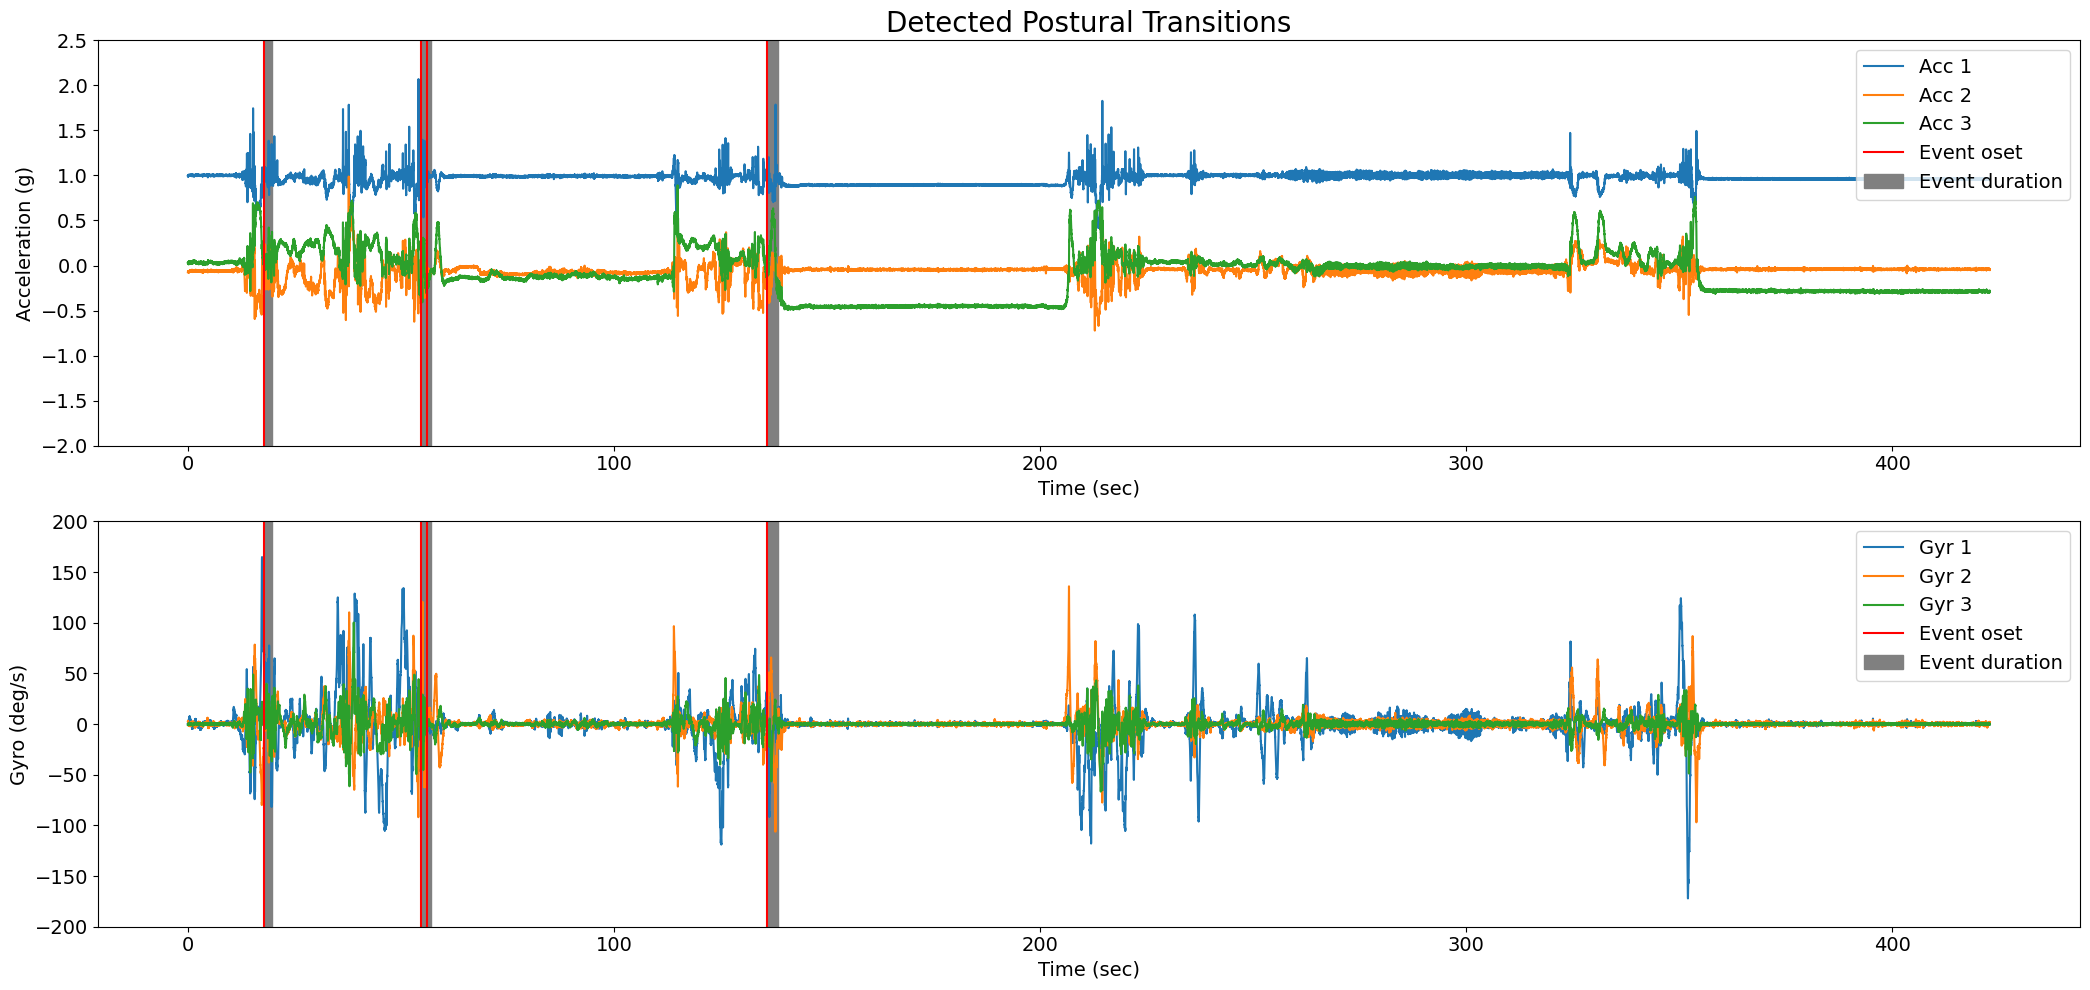

pt_events:      onset  duration    event_type  postural transition angle  \
0   17.895     1.800  sit to stand                  53.263562   
1   54.655     1.905  stand to sit                  47.120448   
2   56.020     1.090  sit to stand                  23.524748   
3  135.895     2.505  stand to sit                  21.764146   

   maximum flexion velocity  maximum extension velocity tracking_systems  \
0                        79                           8              imu   
1                        91                         120              imu   
2                        62                          10              imu   
3                        40                          65              imu   

  tracked_points  
0      LowerBack  
1      LowerBack  
2      LowerBack  
3      LowerBack  


In [10]:
# Create an instance of the PhamSittoStandStandtoSitDetection class
pham = PhamSittoStandStandtoSitDetection()

# Call the sit to satnd and stand to sit detection using pham.detect
pham = pham.detect(
    data=input_data, sampling_freq_Hz=sampling_frequency, plot_results= True
)

# Print events and their corresponding information
pt_events = pham.postural_transitions_
print(f"pt_events: {pt_events}")

## Detailed Visualization of the Detected Postural Transitions

To get a better understanding of the results, we can plot the data and the first detected postural transition (here is sit to stand). The red vertical line shows the onset and the grey area shows the duration of the first postural transition.

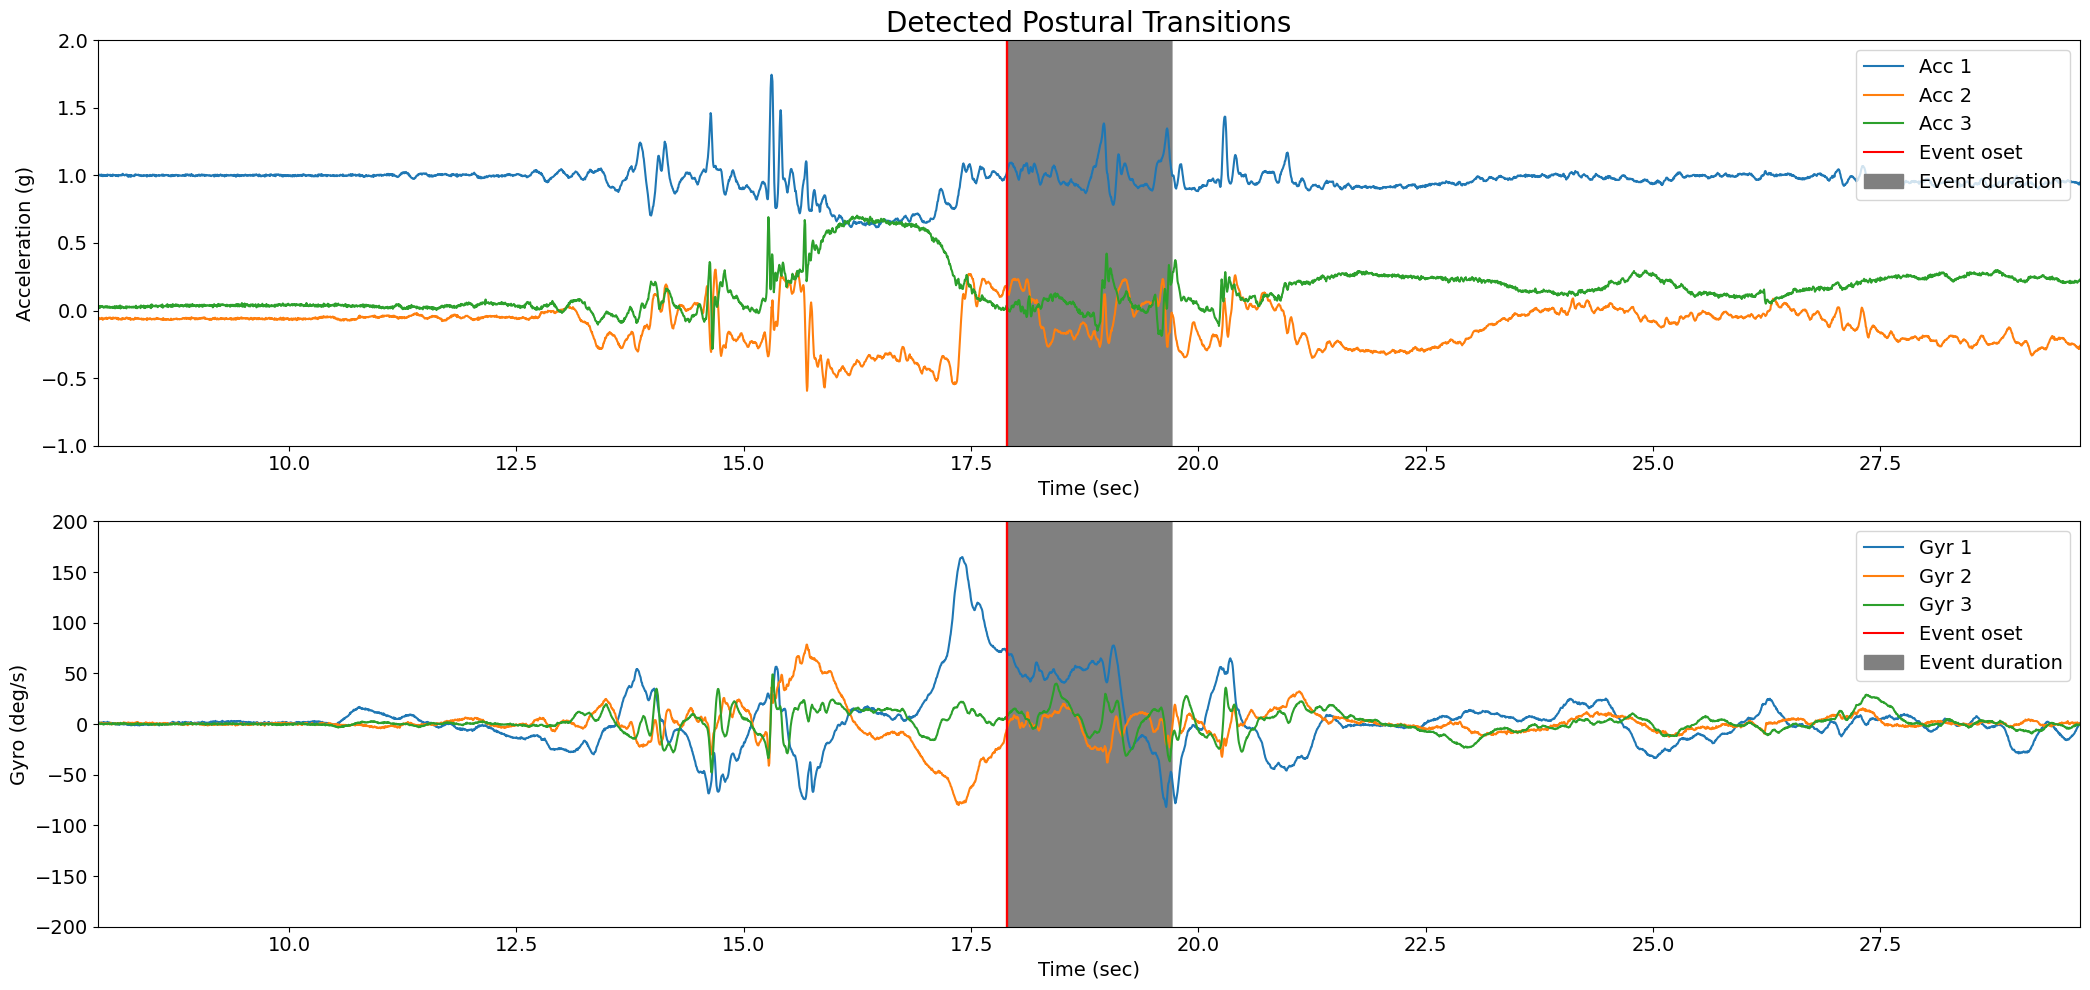

In [14]:
# Figure 
fig = plt.figure(figsize=(21, 10))

# Subplot 1: Acceleration data
ax1 = plt.subplot(211)
for i in range(3):
    ax1.plot(
        np.arange(len(acceleration_data)) / sampling_frequency,
        acceleration_data[f"pelvis_ACC_{chr(120 + i)}"],
    )
for i in range(len(pt_events)):
    onset = pt_events['onset'][0]
    duration = pt_events['duration'][0]
    ax1.axvline(x=onset, color='r')
    ax1.axvspan(onset, (onset + duration), color='grey')
ax1.set_title("Detected Postural Transitions", fontsize=20)
ax1.set_ylabel(f"Acceleration (g)", fontsize=14)
ax1.set_xlabel(f"Time (sec)", fontsize=14)
ax1.legend(["Acc 1", "Acc 2", "Acc 3", "Event oset", "Event duration"], loc="upper right", fontsize=14)
ax1.set_ylim(-1, 2)
start_limit = pt_events["onset"][0] - 10
end_limit = pt_events["onset"][0] + pt_events["duration"][0] + 10
ax1.set_xlim(start_limit, end_limit)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Subplot 2: Gyro data
ax2 = plt.subplot(212)
for i in range(3):
    ax2.plot(
        np.arange(len(gyro_data)) / sampling_frequency,
        gyro_data[f"pelvis_ANGVEL_{chr(120 + i)}"],
    )
for i in range(len(pt_events)):
    onset = pt_events['onset'][0]
    duration = pt_events['duration'][0]
    ax2.axvline(x=onset, color='r')
    ax2.axvspan(onset, (onset + duration), color='grey')
ax1.set_title("Detected Postural Transitions", fontsize=20)
ax2.set_ylabel(f"Gyro (deg/s)", fontsize=14)
ax2.set_xlabel(f"Time (sec)", fontsize=14)
start_limit = pt_events["onset"][0] - 10
end_limit = pt_events["onset"][0] + pt_events["duration"][0] + 10
ax2.set_xlim(start_limit, end_limit)
ax2.legend(["Gyr 1", "Gyr 2", "Gyr 3", "Event oset", "Event duration"], loc="upper right", fontsize=14)
ax2.set_ylim(-200, 200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()
plt.show()